## <div align="center"> Assignment 3</div>
## <div align="center"> Machine Learning</div>
### <div align="center"> Group Assignment</div>


<br><div align="center"> By Group A3: </div>
<div align="center"> Jiaqi Chen, Yuxi Fu, Jiaxuan Lyu, Maria Tsotalou, Qian Zhang </div>

In [1]:
import pandas as pd
import numpy as np
import math 
import random


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns
import timeit

## Question 1

In [2]:
## Load the dataset
loandata = pd.read_csv('loandata.csv') 
loandata.head()

,field,selectiveCollege,sex,Default,loanAmount,graduationYear
0,STEM,0,Male,No,22907,2005
1,HUMANITIES,0,Male,Yes,60087,2010
2,HUMANITIES,0,Female,No,33149,2011
3,STEM,1,Female,No,33342,2007
4,BUSINESS,0,Male,Yes,55834,2013


In [3]:
default_cnt = loandata['Default'].value_counts()
default_cnt

No     1536
Yes     464
Name: Default, dtype: int64

## Question 2

In [4]:
## translate the categorical predictors into numerical predictors
loandata_dummies = pd.get_dummies(loandata)
loandata_dummies

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male,Default_No,Default_Yes
0,0,22907,2005,0,0,1,0,1,1,0
1,0,60087,2010,0,1,0,0,1,0,1
2,0,33149,2011,0,1,0,1,0,1,0
3,1,33342,2007,0,0,1,1,0,1,0
4,0,55834,2013,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,0,34862,2006,1,0,0,1,0,1,0
1996,0,51527,2008,0,1,0,1,0,0,1
1997,0,63594,2012,0,0,1,0,1,1,0
1998,1,54822,2006,1,0,0,1,0,1,0


## Question 3

In [5]:
## Shuffle the data
loandata_dummies = loandata_dummies.sample(frac=1,random_state=4)
loandata_dummies.head()

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_HUMANITIES,field_STEM,sex_Female,sex_Male,Default_No,Default_Yes
1893,0,45354,2007,0,1,0,1,0,1,0
898,0,55232,2004,0,0,1,1,0,1,0
1578,0,63144,2006,1,0,0,1,0,1,0
559,0,38498,2015,0,1,0,1,0,0,1
88,1,38548,2011,0,0,1,0,1,1,0


In [6]:
## Split the data into 50% training data, 25% validation data and 25% test data
training_data = loandata_dummies[0:1000]
validation_data = loandata_dummies[1000:1500]
test_data = loandata_dummies[1500:2000]

In [7]:
training_data_x = training_data.drop(columns = ['Default_No','Default_Yes'])
training_data_y = training_data['Default_Yes']

validation_data_x = validation_data.drop(columns = ['Default_No','Default_Yes'])
validation_data_y = validation_data['Default_Yes']

test_data_x = test_data.drop(columns = ['Default_No','Default_Yes'])
test_data_y = test_data['Default_Yes']

## Question 4

In [8]:
# Calculation of the Naïve Benchmark (majority predictor)
default_no_cnt = training_data['Default_No'].value_counts()
default_yes_cnt = training_data['Default_Yes'].value_counts()
print("Number of no default =", default_no_cnt[1])
print("Number of default =", default_yes_cnt[1])

Number of no default = 753
Number of default = 247


The majority of the labels of the training data are "No Default".

In [9]:
default_no_validation = validation_data['Default_No'].value_counts()
default_yes_validation = validation_data['Default_Yes'].value_counts()
print("Number of no default in validation set=", default_no_validation[1])
print("Number of default in validation set=", default_yes_validation[1])

Number of no default in validation set= 390
Number of default in validation set= 110


If we label the whole validation set as "No Default" we will have a misclassification rate of 110/500 = 0.22 = 22%.

## Question 5 

In [10]:
# Return the maximum possible depth of this decision tree classifier 
clf = DecisionTreeClassifier() 
clf.fit(training_data_x, training_data_y)
max_depth = clf.get_depth()
depth_list = range(1,max_depth)

In [11]:
# Run through all possible max depth, and return the max depth the provides the best classifer on 
# predicting validation data
dt_scores_list_training = []
dt_scores_list_validation = []
best_depth = 0
best_score = 0

for depth in depth_list:
    clf = DecisionTreeClassifier(max_depth=depth) 
    clf.fit(training_data_x,training_data_y)
   
    dt_scores_list_training.append(clf.score(training_data_x,training_data_y))
    
    accuracy_validation = clf.score(validation_data_x,validation_data_y)
    dt_scores_list_validation.append(accuracy_validation)
    
    if best_score < accuracy_validation:
        best_score = clf.score(validation_data_x,validation_data_y)
        best_depth = depth


In [12]:
# Create the data frame to store all the data
df_dict = {'Score of training data': dt_scores_list_training, 
           'Score of validation data': dt_scores_list_validation,
           'Maximum Depth':depth_list}  
dt_scores_list_df = pd.DataFrame(df_dict)

In [13]:
# Use the best depth classifier to predict the training data and validation data
clf_best = DecisionTreeClassifier(max_depth = best_depth)
clf_best.fit(training_data_x,training_data_y)
score_training = clf_best.score(training_data_x,training_data_y)
score_validation = clf_best.score(validation_data_x,validation_data_y)
print("For predicting the validation data, the maximum depth for the classifier is {}, where the best score is {}".format(best_depth,best_score))        
print('The accuracy rate of using this classifier to predict the training data is {}.'.format(score_training))
print('The accuracy rate of using this classifier to predict the validation data is {}.'.format(score_validation))



For predicting the validation data, the maximum depth for the classifier is 2, where the best score is 0.87
The accuracy rate of using this classifier to predict the training data is 0.877.
The accuracy rate of using this classifier to predict the validation data is 0.87.


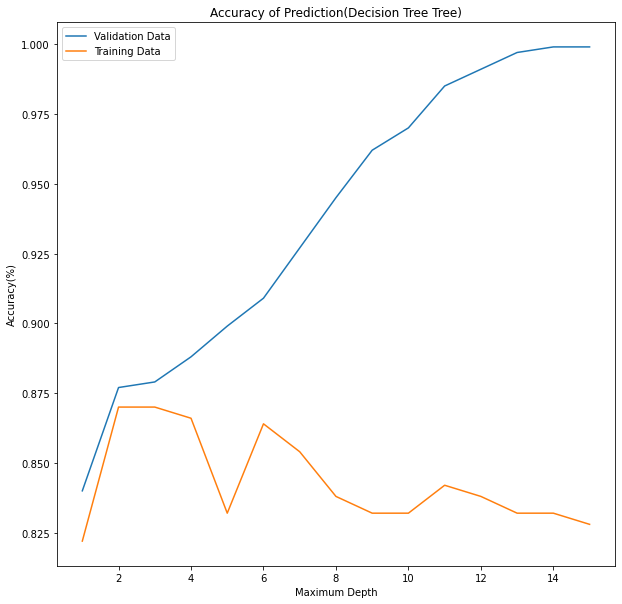

In [14]:
# Plot the maximum depth vs the score of predicting 

f = plt.figure(figsize=(10,10))
plt.plot(dt_scores_list_df['Maximum Depth'], dt_scores_list_df['Score of training data'], label = "Validation Data")
plt.plot(dt_scores_list_df['Maximum Depth'], dt_scores_list_df['Score of validation data'], label = "Training Data")
plt.title('Accuracy of Prediction(Decision Tree Tree)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy(%)')
plt.legend()


In [15]:
# Train the decision tree classifier so it returns that highest accuracy rate of predicting training data
alf = DecisionTreeClassifier() # 
alf.fit(training_data_x,training_data_y)
best_score_training = alf.score(training_data_x,training_data_y)
best_depth_training = alf.get_depth()

# Use this decision tree classifier to predict the validation data
validation_Score=alf.score(validation_data_x,validation_data_y)

print('The depth that achieves the highest accuracy rate for the training data set is {}, and the corresponding accuracy rate is {}.'.format(best_depth_training, best_score_training))
print('However, with maximum depth equal to {}, the accuracy rate for the validation data is {} , which is lower than what we acheive with depth = 2. This happens due to over-fitting problem.'.format(best_depth_training,validation_Score))

The depth that achieves the highest accuracy rate for the training data set is 16, and the corresponding accuracy rate is 1.0.
However, with maximum depth equal to 16, the accuracy rate for the validation data is 0.834 , which is lower than what we acheive with depth = 2. This happens due to over-fitting problem.


In general, the deeper the tree grows, the more complex the model will become because there will be more splits and more information about the data will be captured.
However this means that the model will fit as perfect as it can to the training data, but will not generate good predictions for the testing set.
Hence we use the validation dataset to determine the proper max_depth of the model.

In [16]:
score_test = clf_best.score(test_data_x,test_data_y)
print("Accuracy fot testing data = {}.".format(score_test))

Accuracy fot testing data = 0.862.


The classifier gives an accuracy of 0.862 for depth = 2. 

## Question 6

In [17]:
estimator_list = np.arange(1,50).tolist()
rfs_scores_list_training = []
rfs_scores_list_validation = []
training_time = []

# Run through a list of number of estimators, and return the max depth the provides the best classifer on predicting validation data
for k in estimator_list:
    clf   = RandomForestClassifier(n_estimators=k)
    start = timeit.default_timer()
    clf.fit(training_data_x, training_data_y)
    end   = timeit.default_timer()
    training_time.append(end-start)

    rfs_scores_list_training.append(clf.score(training_data_x,training_data_y))
    rfs_scores_list_validation.append(clf.score(validation_data_x,validation_data_y))


In [18]:
rfs_dict = {'Number of Estimator': estimator_list, 
            'Score of training data': rfs_scores_list_training,
            'Score of validation data':rfs_scores_list_validation, 
            'Training time':training_time}  
rfs_scores_list_df = pd.DataFrame(rfs_dict)

# Return the running time while training the best classifer
max_row = rfs_scores_list_df['Score of validation data'].idxmax()
best_number_of_estimator=rfs_scores_list_df.iloc[max_row]['Number of Estimator']
training_time = rfs_scores_list_df.iloc[max_row]['Training time']
best_score    = rfs_scores_list_df.iloc[max_row]['Score of validation data']

print("For predicting the validation data, the best number of estimator for the classifier is {:.0f}, where the best score is {}, and the training time is {:.5f}s.".format(best_number_of_estimator, best_score,training_time))        


For predicting the validation data, the best number of estimator for the classifier is 9, where the best score is 0.858, and the training time is 0.03678s.


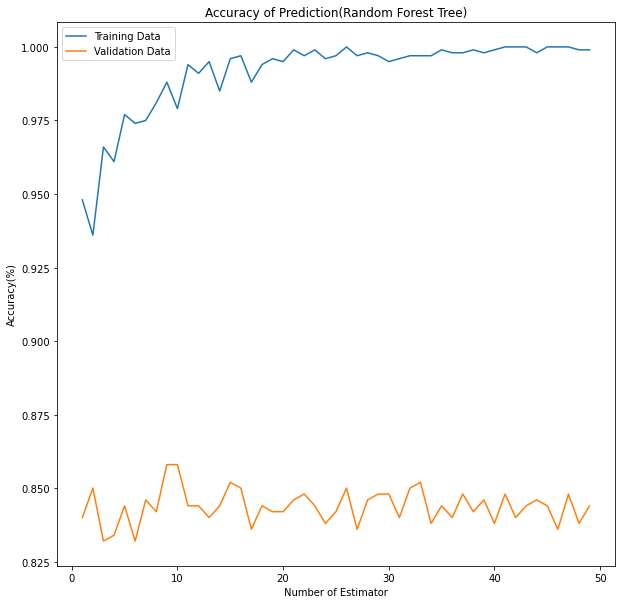

In [19]:
# Plot the number of estimator vs the score of predicting 
f = plt.figure(figsize=(10,10))
plt.plot(rfs_scores_list_df['Number of Estimator'], rfs_scores_list_df['Score of training data'], label = "Training Data")
plt.plot(rfs_scores_list_df['Number of Estimator'], rfs_scores_list_df['Score of validation data'], label = "Validation Data")
plt.title('Accuracy of Prediction(Random Forest Tree)')
plt.xlabel('Number of Estimator')
plt.ylabel('Accuracy(%)')
plt.legend()

## Question 7

We observe that choosing the number of estimators to be equal to 7 will give us the best accuracy score for the validation data set and a low training time. Consequently it seems as a good choice bsed on our available data. 

For the random forest tree, the training time increases linearly with the increase of the estimators' number.


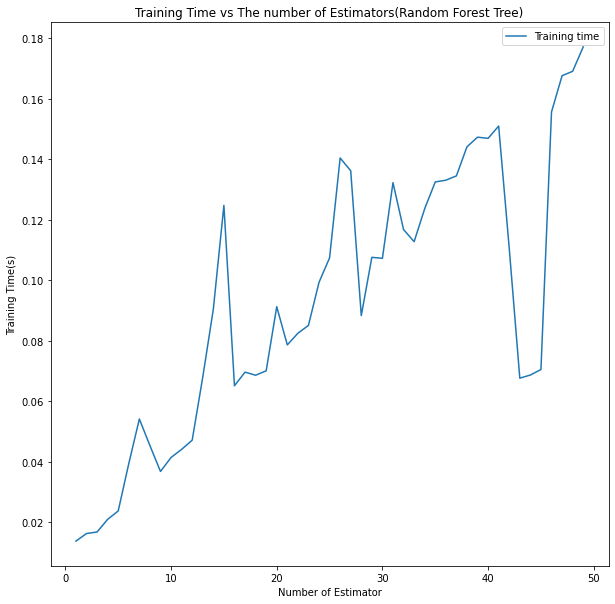

In [20]:
# Plot the number of estimators versus the training time
f = plt.figure(figsize=(10,10))
plt.plot(rfs_scores_list_df['Number of Estimator'], rfs_scores_list_df['Training time'], label = "Training time")
plt.title('Training Time vs The number of Estimators(Random Forest Tree)')
plt.xlabel('Number of Estimator')
plt.ylabel('Training Time(s)')
plt.legend()
print('For the random forest tree, the training time increases linearly with the increase of the estimators\' number.')

## Question 8

In [21]:
# Train the decision tree with the best maximum depth, and use it to predict the result of test data
clf = DecisionTreeClassifier(max_depth = best_depth)
start = timeit.default_timer()
clf.fit(training_data_x,training_data_y)
score_test = clf.score(test_data_x,test_data_y)
end = timeit.default_timer()
Running_time = end - start
print('The accuracy rate of using the decision tree to predict the test data is {}, and the training time is {:.5f}s.'.format(score_test,Running_time))

The accuracy rate of using the decision tree to predict the test data is 0.862, and the training time is 0.01353s.


In [22]:
# Train the random forest tree with the best number of estimators, and use it to predict the result of test data
clf = RandomForestClassifier(n_estimators=int(best_number_of_estimator))
start = timeit.default_timer()
clf.fit(training_data_x,training_data_y)
score_test = clf.score(test_data_x,test_data_y)
end = timeit.default_timer()
Running_time = end - start

print('The accuracy rate of using random forest classifier to predict test data is {}, and the training time is {:.5f}s.'.format(score_test,Running_time))

The accuracy rate of using random forest classifier to predict test data is 0.842, and the training time is 0.06057s.


In terms of performance, we have trained both the decision tree and random forest tree multiple times, and the accuracy of the decision tree is always slightly higher of that of the random forest algorithm. 
   
In terms of interpretability, the decision tree has a very high interpretability since the way that the data are classified is absolutely clear. That said, random forests in general have relatively high level of interpretability too. 

In terms of training time, for all the times, the training time for the random forest classifier is significantly higher than the training time for the decision tree. 

With regard to the generalisability, for both algorithms, we need to use for loop to determine the classifier which returns the highest accuracy while predicting the result of validation data. For decision tree, the package includes the function which returns the highest possibly maximum depth; however, for random forest tree we need to guess a range for the number of estimators. Therefore, the decision tree  could be generalised easier than random forest tree. 


Overall, based on our data the decision tree seems to be a better choice than the random forest algorithm for predicting defaults in student loan applications.